In [1]:
from __future__ import print_function
import os
data_path = ['Wholesale_Customers_Data']
print (data_path)

['Wholesale_Customers_Data']


In [2]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Wholesale_Customers_Data.csv'])
print(filepath)
data = pd.read_csv('Wholesale_Customers_Data.csv')
data.head()

Wholesale_Customers_Data\Wholesale_Customers_Data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)


440
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [5]:
#data_type
idx = pd.value_counts(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
print(idx)
data.mean(axis=0)

Delicassen          1
Region              1
Channel             1
Fresh               1
Milk                1
Detergents_Paper    1
Grocery             1
Frozen              1
dtype: int64


Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [6]:
# The mean calculation
data.groupby('Channel').mean()
Region = data['Region'].mean()
Fresh = data['Fresh'].mean()
Milk = data['Milk'].mean()
Grocery = data['Grocery'].mean()
Frozen = data['Frozen'].mean()
Detergents_Paper = data['Detergents_Paper'].mean()
Delicassen = data['Delicassen'].mean()
#'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'

print("Region", Region ,'\n', "Fresh", Fresh ,'\n',"Milk", Milk,'\n',"Grocery", Grocery,'\n',"Frozen", Frozen,'\n',"Detergents_Paper", Detergents_Paper,'\n',"Delicassen", Delicassen)

Region 2.543181818181818 
 Fresh 12000.297727272728 
 Milk 5796.265909090909 
 Grocery 7951.277272727273 
 Frozen 3071.931818181818 
 Detergents_Paper 2881.4931818181817 
 Delicassen 1524.8704545454545


In [7]:
# The median calculation
# The mean calculation
data.groupby('Channel').median()
Region = data['Region'].median()
Fresh = data['Fresh'].median()
Milk = data['Milk'].median()
Grocery = data['Grocery'].median()
Frozen = data['Frozen'].median()
Detergents_Paper = data['Detergents_Paper'].median()
Delicassen = data['Delicassen'].median()
#'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'

print("Region", Region ,'\n', "Fresh", Fresh ,'\n',"Milk", Milk,'\n',"Grocery", Grocery,'\n',"Frozen", Frozen,'\n',"Detergents_Paper", Detergents_Paper,'\n',"Delicassen", Delicassen)

Region 3.0 
 Fresh 8504.0 
 Milk 3627.0 
 Grocery 4755.5 
 Frozen 1526.0 
 Detergents_Paper 816.5 
 Delicassen 965.5


In [8]:
# applying multiple functions at once - 2 methods

#data.groupby('Channel').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('Channel').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

Region                Fresh                  Milk         \
             mean median          mean  median          mean median   
Channel                                                               
1        2.510067      3  13475.560403  9581.5   3451.724832   2157   
2        2.612676      3   8904.323944  5993.5  10716.500000   7812   

              Grocery              Frozen         Detergents_Paper          \
                 mean median         mean  median             mean  median   
Channel                                                                      
1         3962.137584   2684  3748.251678  2057.5       790.560403   385.5   
2        16322.852113  12390  1652.612676  1081.0      7269.507042  5614.5   

          Delicassen         
                mean median  
Channel                      
1        1415.956376    821  
2        1753.436620   1350

In [9]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'Channel'}
#agg_dict['Region'] = 'max'
pprint(agg_dict)
data.groupby('Channel').agg(agg_dict)

{'Delicassen': ['mean', 'median'],
 'Detergents_Paper': ['mean', 'median'],
 'Fresh': ['mean', 'median'],
 'Frozen': ['mean', 'median'],
 'Grocery': ['mean', 'median'],
 'Milk': ['mean', 'median'],
 'Region': ['mean', 'median']}


Region                Fresh                  Milk         \
             mean median          mean  median          mean median   
Channel                                                               
1        2.510067      3  13475.560403  9581.5   3451.724832   2157   
2        2.612676      3   8904.323944  5993.5  10716.500000   7812   

              Grocery              Frozen         Detergents_Paper          \
                 mean median         mean  median             mean  median   
Channel                                                                      
1         3962.137584   2684  3748.251678  2057.5       790.560403   385.5   
2        16322.852113  12390  1652.612676  1081.0      7269.507042  5614.5   

          Delicassen         
                mean median  
Channel                      
1        1415.956376    821  
2        1753.436620   1350

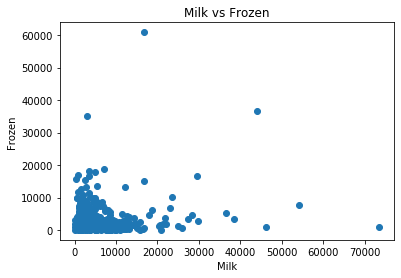

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.Milk , data.Frozen)

# Label the axes
ax.set(xlabel='Milk',
       ylabel='Frozen',
       title='Milk vs Frozen');

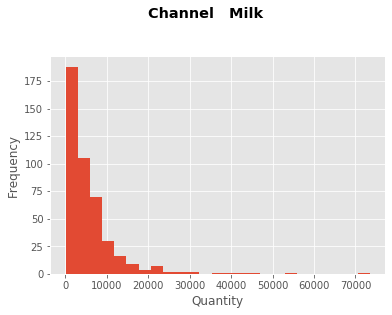

In [11]:
plt.style.use('ggplot')
plt.hist(data.Milk, bins=25)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
  
plt.title('Channel   Milk     \n\n', 
          fontweight ="bold") 
  
plt.show() 

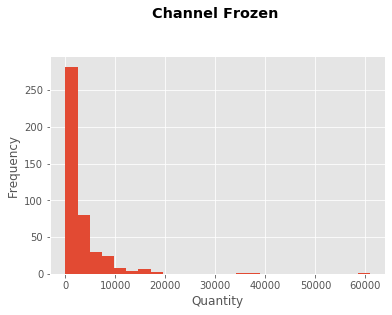

In [12]:
plt.hist(data.Frozen, bins=25)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
  
plt.title('Channel Frozen \n\n', 
          fontweight ="bold") 
  
plt.show() 

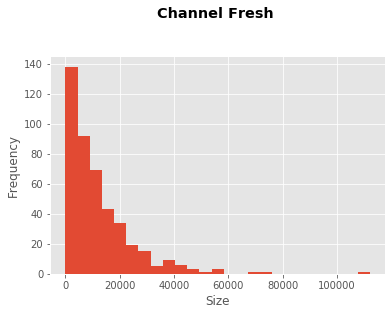

In [13]:
#'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'
plt.hist(data.Fresh, bins=25)
plt.xlabel('Size')
plt.ylabel('Frequency')
  
plt.title('Channel Fresh \n\n', 
          fontweight ="bold") 
  
plt.show() 

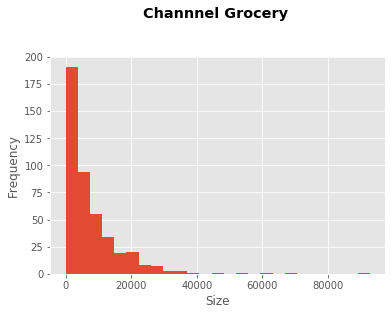

In [14]:
plt.hist(data.Grocery, bins=25)
plt.xlabel('Size')
plt.ylabel('Frequency')
  
plt.title('Channnel Grocery \n\n', 
          fontweight ="bold") 
  
plt.show() 

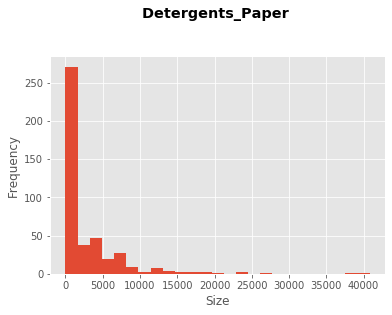

In [15]:
plt.hist(data.Detergents_Paper, bins=25)
plt.xlabel('Size')
plt.ylabel('Frequency')
  
plt.title('Detergents_Paper \n\n', 
          fontweight ="bold") 
  
plt.show() 

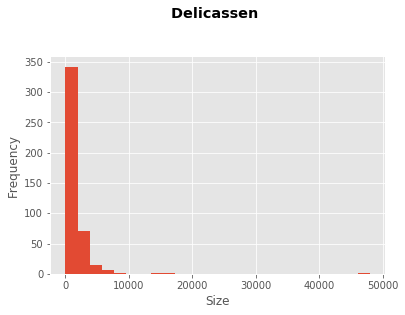

In [16]:
plt.hist(data.Delicassen, bins=25)
plt.xlabel('Size')
plt.ylabel('Frequency')
  
plt.title('Delicassen \n\n', 
          fontweight ="bold") 
  
plt.show() 

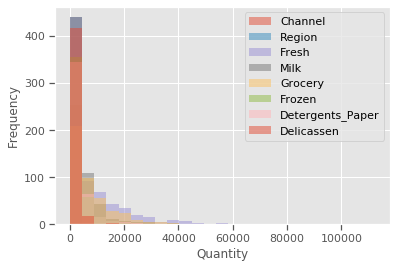

In [18]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Quantity');

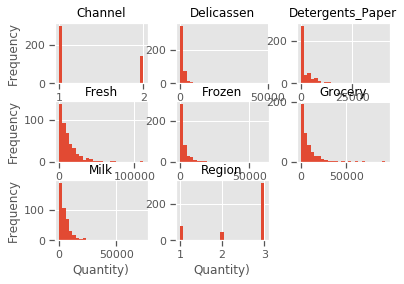

In [19]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Quantity)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

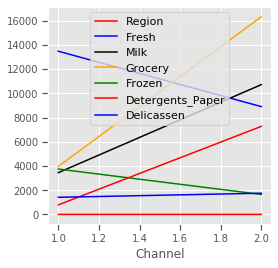

In [20]:
(data
.groupby('Channel')
.mean()
.plot(color=['red' ,
             'blue' ,
             'black' ,
             'orange',
             'green'],fontsize=10.0, figsize=(4,4)))

In [21]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('Channel')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,Channel,measurement,size
0,2,Region,3
1,2,Fresh,12669
2,2,Milk,9656
3,2,Grocery,7561
4,2,Frozen,214


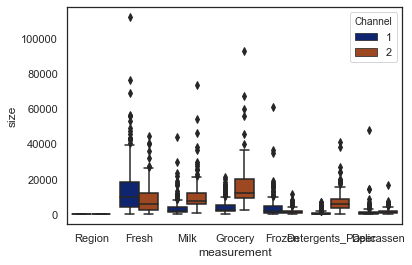

In [22]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='Channel', data=plot_data);